# CODING

## Setup

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# Settings
sns.set_style('whitegrid')
# Make static images plots embedded in the notebook
%matplotlib inline

In [3]:
# Get the Data and create the data frame
path = './data/'
filename = 'titanic-data.csv'
titanic = pd.read_csv(path+filename)

## Data Summary

In [4]:
# First rows
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# last rows
titanic.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [6]:
# Summary of data
titanic.describe(include = 'all')

PassengerId    Survived      Pclass                       Name   Sex  \
count    891.000000  891.000000  891.000000                        891   891   
unique          NaN         NaN         NaN                        891     2   
top             NaN         NaN         NaN  Graham, Mr. George Edward  male   
freq            NaN         NaN         NaN                          1   577   
mean     446.000000    0.383838    2.308642                        NaN   NaN   
std      257.353842    0.486592    0.836071                        NaN   NaN   
min        1.000000    0.000000    1.000000                        NaN   NaN   
25%      223.500000    0.000000    2.000000                        NaN   NaN   
50%      446.000000    0.000000    3.000000                        NaN   NaN   
75%      668.500000    1.000000    3.000000                        NaN   NaN   
max      891.000000    1.000000    3.000000                        NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare        Cabin  \
count   714.000000  891.000000  891.000000       891  891.000000          204   
unique         NaN         NaN         NaN       681         NaN          147   
top            NaN         NaN         NaN  CA. 2343         NaN  C23 C25 C27   
freq           NaN         NaN         NaN         7         NaN            4   
mean     29.699118    0.523008    0.381594       NaN   32.204208          NaN   
std      14.526497    1.102743    0.806057       NaN   49.693429          NaN   
min       0.420000    0.000000    0.000000       NaN    0.000000          NaN   
25%      20.125000    0.000000    0.000000       NaN    7.910400          NaN   
50%      28.000000    0.000000    0.000000       NaN   14.454200          NaN   
75%      38.000000    1.000000    0.000000       NaN   31.000000          NaN   
max      80.000000    8.000000    6.000000       NaN  512.329200          NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [7]:
# the index values
titanic.index

RangeIndex(start=0, stop=891, step=1)

## Data type, size, missing and duplicated values

In [8]:
# Data frame summary 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


  variableType  count
0        int64      5
1       object      5
2      float64      2


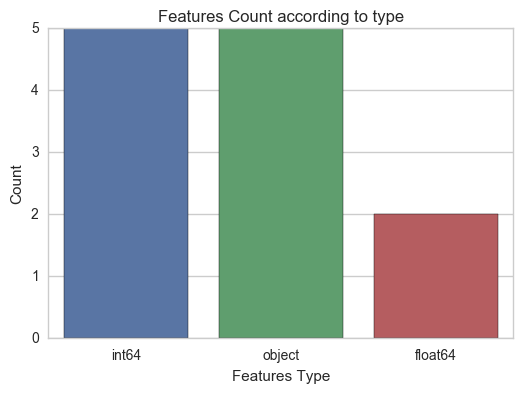

In [9]:
# Plot Feature Type graph
df = pd.DataFrame(titanic.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
print df
sns.barplot(data=df,x="variableType",y="count")
ax.set(xlabel='Features Type', ylabel='Count')
plt.title("Features Count according to type")
# Save figure in file
plt.savefig('TypeOfFeatures.png')
plt.show()

In [10]:
# size of the data frame
titanic.shape

(891, 12)

In [11]:
# Percentage of NaN values in data frame
def PercentNaN(df,feature):
    f_NaN = df[feature].isnull().sum()*100.0/df.shape[0]
    print "% of NaN values for ",feature,"{0:.2f}".format(f_NaN)
    return f_NaN

Cabin_NaN = PercentNaN(titanic,'Cabin')
Age_NaN = PercentNaN(titanic,'Age')
Embarked_NaN = PercentNaN(titanic,'Embarked')

% of NaN values for  Cabin 77.10
% of NaN values for  Age 19.87
% of NaN values for  Embarked 0.22


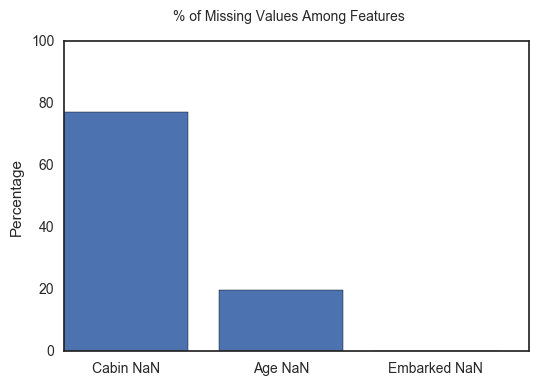

In [12]:
# Plot Missing Values Graph
plt.style.use('seaborn-white')

labels = ['Cabin NaN', 'Age NaN', 'Embarked NaN']
x_pos = np.arange(len(labels))
width = 0.8
vals = (Cabin_NaN,Age_NaN,Embarked_NaN)

plt.bar(x_pos,vals)
plt.suptitle('% of Missing Values Among Features')
plt.xticks(x_pos)
plt.xticks(x_pos+width/2.0, labels)
plt.ylabel('Percentage')
axes = plt.gca()
axes.set_ylim([0,100])
# Save figure in file
plt.savefig('MissingDataAmongFeatures.png')
plt.show()

In [13]:
# Data Quality Analysis function
# i.e. Is there any missing and duplicate value for given feature and given data frame? 
def dataqualityanalysis(df,feature):
    print "# unique values: ",len(df[feature].unique())
    print "# null values:",titanic[feature].isnull().sum()
    if len(df.set_index(feature).index.get_duplicates()) > 0:
        print "# duplicates: ", len(df.set_index(feature).index.get_duplicates())
        print "duplicates are:\n"
        print df.set_index(feature).index.get_duplicates()

In [14]:
# Data Quality Analysis for Name feature
dataqualityanalysis(titanic,'Name')

# unique values:  891
# null values: 0


In [15]:
# Data Quality Analysis for Ticket feature
dataqualityanalysis(titanic,'Ticket')

# unique values:  681
# null values: 0
# duplicates:  134
duplicates are:

['110152', '110413', '110465', '111361', '113505', '113572', '113760', '113776', '113781', '113789', '113798', '113803', '113806', '11668', '11751', '11767', '11967', '12749', '13502', '13507', '1601', '16966', '17421', '17453', '17474', '19877', '19928', '19943', '19950', '19996', '220845', '230080', '230136', '230433', '231919', '237736', '239853', '239865', '24160', '243847', '244252', '244367', '248727', '248738', '250644', '250647', '250649', '250655', '2627', '26360', '2651', '2653', '2659', '2661', '2665', '2666', '2668', '2678', '2691', '2699', '28403', '2908', '29106', '29750', '3101278', '3101295', '31027', '345764', '345773', '347054', '347077', '347080', '347082', '347088', '347742', '349237', '349909', '35273', '35281', '358585', '363291', '364516', '364849', '367226', '367230', '36928', '36947', '36973', '370129', '370365', '371110', '376564', '382652', '392096', '4133', '54636', '7534', 'A/4 48871

In [16]:
# Data Quality Analysis for Ticket feature
dataqualityanalysis(titanic,'Cabin')

# unique values:  148
# null values: 687
# duplicates:  47
duplicates are:

[nan, 'B18', 'B20', 'B22', 'B28', 'B35', 'B49', 'B5', 'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B77', 'B96 B98', 'C123', 'C124', 'C125', 'C126', 'C2', 'C22 C26', 'C23 C25 C27', 'C52', 'C65', 'C68', 'C78', 'C83', 'C92', 'C93', 'D', 'D17', 'D20', 'D26', 'D33', 'D35', 'D36', 'E101', 'E121', 'E24', 'E25', 'E33', 'E44', 'E67', 'E8', 'F G73', 'F2', 'F33', 'F4', 'G6']


In [17]:
# Data Quality Analysis for Embarked feature
dataqualityanalysis(titanic,'Embarked')

# unique values:  4
# null values: 2
# duplicates:  4
duplicates are:

[nan, 'C', 'Q', 'S']


Embarked
C    168
Q     77
S    644
dtype: int64


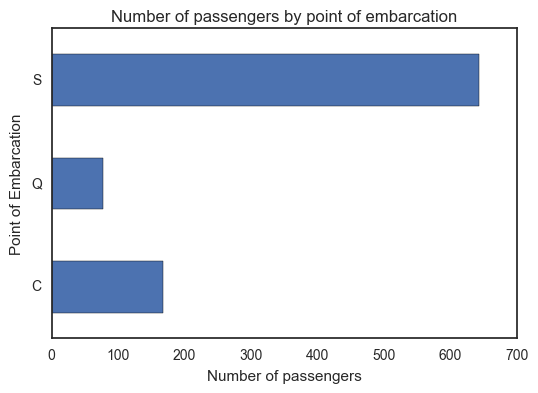

In [18]:
# Analysis with Group by Embarked
# where most people embarked?
# conclusion:  at Southampton
Embarked = ['C','Q','S']
print titanic.groupby([titanic.Embarked]).size()
titanic.groupby([titanic.Embarked]).size().plot(kind='barh')
plt.ylabel('Point of Embarcation')
plt.yticks(np.arange(3), Embarked)
plt.xlabel('Number of passengers')
plt.title('Number of passengers by point of embarcation')
plt.savefig('NbPassengersByEmbarcationPt.png')
plt.show()

In [19]:
# which are the two empty values?
print titanic[titanic.Embarked.isnull()]

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


## Processing missing values for Embarked feature

In [20]:
# Processing missing values: 
# how to deal: 
# option 1: retrieve the actual values
# option 2: set the value where most of people embarked (i.e. Southampton) 
# we are able to get the actual value from research -> Both passengers embarked at Southampton
# replace with the actual value: S (i.e. Southampton)
titanic.loc[829,'Embarked'] = 'S'
titanic.loc[61,'Embarked'] = 'S'

## Create new Title feature

In [21]:
# Create new feature: Title
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            return substring
    print big_string
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

titanic['Title']=titanic['Name'].map(lambda x: substrings_in_string(x, title_list))
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
titanic['Title']=titanic.apply(replace_titles, axis=1)

## Relation between Fare, Embarked and Class 

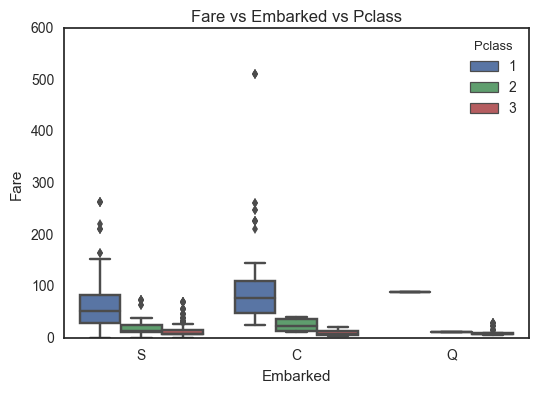

In [22]:
# Use of Box plot
sns.boxplot(x="Embarked",y="Fare", data=titanic,hue='Pclass')
plt.title('Fare vs Embarked vs Pclass')
plt.savefig('boxplotFarevsEmbarkedvsPclass.png')

##  Change feature representation for Embarked

In [23]:
# Change feature representation for Embarked
titanic = pd.get_dummies(titanic,columns=['Embarked'])
# Change features names
titanic.rename(columns={'Embarked_C': 'C', 'Embarked_Q': 'Q', 'Embarked_S': 'S'}, inplace=True)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Title  C  Q  S  
0      0         A/5 21171   7.2500   NaN    Mr  0  0  1  
1      0          PC 17599  71.2833   C85   Mrs  1  0  0  
2      0  STON/O2. 3101282   7.9250   NaN  Miss  0  0  1  
3      0            113803  53.1000  C123   Mrs  0  0  1  
4      0            373450   8.0500   NaN    Mr  0  0  1

## Processing missing values for Age

In [24]:
# Is there any missing value for Age feature?
# how to deal: 
# option 1: set to zero -> NO
# option 2: set mean 
# from the overall population -> NO
# from groups: Title -> YES
# option 3: discard values or observation -> NO
# this feature is continuous: no need to look for unique values and duplicates

In [25]:
# First get the median values per Title.
df = titanic.groupby('Title')
df_fillna = df.Age.median()
print df_fillna

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64


In [26]:
# Replace missing values for Age with the median value of the group split by title
for idx in titanic[titanic.Age.isnull()].index:
    title = titanic.loc[idx,'Title']
    titanic.loc[idx,'Age'] = df_fillna[title]

## Change feature representation for Sex

In [27]:
# Change feature representation for Sex:
titanic = pd.get_dummies(titanic,columns=['Sex'])
#  change features names
titanic.rename(columns={'Sex_female': 'Female', 'Sex_male': 'Male'}, inplace=True)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Title  C  Q  S  Female  Male  
0         A/5 21171   7.2500   NaN    Mr  0  0  1       0     1  
1          PC 17599  71.2833   C85   Mrs  1  0  0       1     0  
2  STON/O2. 3101282   7.9250   NaN  Miss  0  0  1       1     0  
3            113803  53.1000  C123   Mrs  0  0  1       1     0  
4            373450   8.0500   NaN    Mr  0  0  1       0     1

## Change feature representation for Title

In [28]:
# Change feature representation for Title
titanic = pd.get_dummies(titanic,columns=['Title'])
# Change features name
titanic.rename(columns={'Title_Master': 'Master', 'Title_Miss': 'Miss', 'Title_Mr': 'Mr', 'Title_Mrs': 'Mrs'}, inplace=True)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  C  Q  S  Female  Male  Master  Miss  Mr  \
0         A/5 21171   7.2500   NaN  0  0  1       0     1       0     0   1   
1          PC 17599  71.2833   C85  1  0  0       1     0       0     0   0   
2  STON/O2. 3101282   7.9250   NaN  0  0  1       1     0       0     1   0   
3            113803  53.1000  C123  0  0  1       1     0       0     0   0   
4            373450   8.0500   NaN  0  0  1       0     1       0     0   1   

   Mrs  
0    0  
1    1  
2    0  
3    1  
4    0

## Build new feature Child

In [29]:
# Build new feature Child
for ix in titanic.index:
    age = titanic.loc[ix,'Age']
    if age >= 18:
        titanic.loc[ix,'Child'] = 0
        titanic.loc[ix,'Adult'] = 1
    elif age < 18:
        titanic.loc[ix,'Child'] = 1
        titanic.loc[ix,'Adult'] = 1
    else:
        titanic.loc[ix,'Child'] = np.nan
        titanic.loc[ix,'Adult'] = np.nan        

## Features distribution

In [30]:
# which sex is the most common?
titanic.Male.describe()

count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Male, dtype: float64

In [31]:
titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.438220
SibSp          3.695352
Parch          2.749117
Fare           4.787317
C              1.595149
Q              2.948778
S             -1.009665
Female         0.618921
Male          -0.618921
Master         4.403096
Miss           1.469548
Mr            -0.391769
Mrs            1.911042
Child          2.186926
Adult          0.000000
dtype: float64

In [32]:
titanic.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             30.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
C                0.0000
Q                0.0000
S                1.0000
Female           0.0000
Male             1.0000
Master           0.0000
Miss             0.0000
Mr               1.0000
Mrs              0.0000
Child            0.0000
Adult            1.0000
dtype: float64

In [33]:
# Drop unused variables
# PassengerId is useless since it is redundant with titanic.index
titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)
print titanic.columns.values

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'C' 'Q' 'S' 'Female'
 'Male' 'Master' 'Miss' 'Mr' 'Mrs' 'Child' 'Adult']


In [34]:
# What are the most frequent values for each feature
titanic.mode()

Survived  Pclass   Age  SibSp  Parch  Fare  C  Q  S  Female  Male  Master  \
0         0       3  30.0      0      0  8.05  0  0  1       0     1       0   

   Miss  Mr  Mrs  Child  Adult  
0     0   1    0    0.0    1.0

Summarize about Age
Mean: 29.377295174
Mode: 0    30.0
dtype: float64
Median: 30.0
Standard deviation: 13.25424584
Minimum: 0.42
Maximum: 80.0


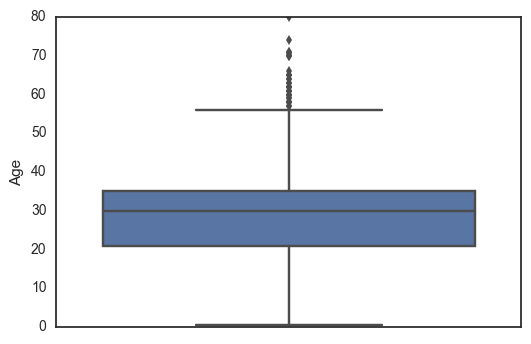

In [35]:
# Summarize the data for Age Feature
print "Summarize about Age"

def describe_data(data):
    print 'Mean:', data.mean()
    print 'Mode:',data.mode()
    print 'Median:', data.median()
    print 'Standard deviation:', data.std()
    print 'Minimum:', data.min()
    print 'Maximum:', data.max() 


describe_data(titanic.Age)

sns.boxplot(y="Age", data=titanic)
plt.savefig('boxplotAge.png')

Summarize about Fare
Mean: 32.2042079686
Mode: 0    8.05
dtype: float64
Median: 14.4542
Standard deviation: 49.6934285972
Minimum: 0.0
Maximum: 512.3292


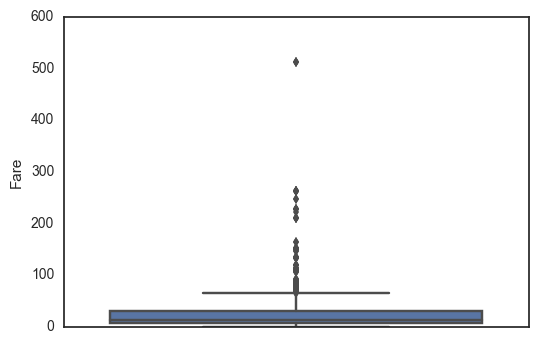

In [36]:
# Summarize the data for FARE feature
print "Summarize about Fare"
describe_data(titanic.Fare)

# display the boxplot
sns.boxplot(y="Fare", data=titanic)
plt.savefig('boxplotFare.png')

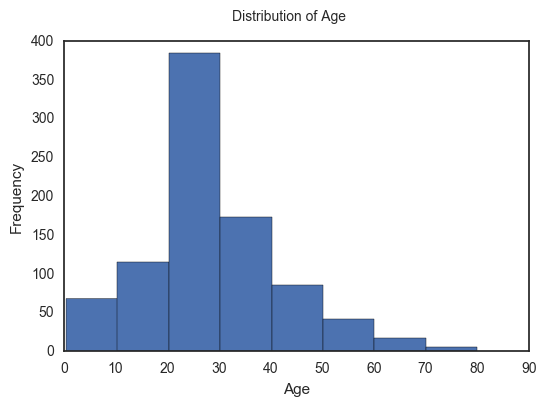

In [37]:
# Distribution of Age
plt.style.use('seaborn-white')
titanic.Age.plot.hist(bins=8)
plt.suptitle('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0, 90, 0, 400])
plt.savefig('AgeDistribution.png')
plt.show()

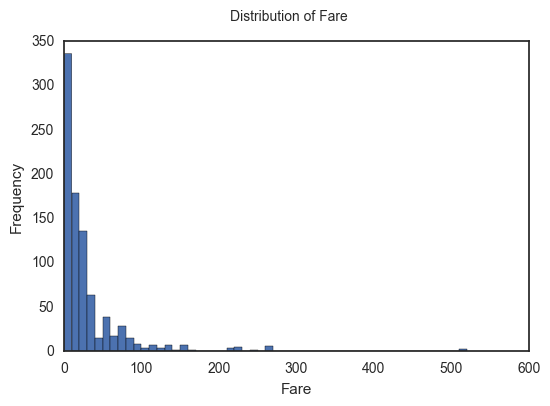

In [38]:
# Distribution of fare
plt.style.use('seaborn-white')
#fig = plt.figure()
binwidth = 10
bins = np.arange(min(titanic.Fare), max(titanic.Fare) + binwidth, binwidth)
plt.hist(titanic.Fare, bins=bins)
#titanic.Fare.hist(bins=bins)
plt.suptitle('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.savefig('FareDistribution.png')
plt.show()

## Relation between features

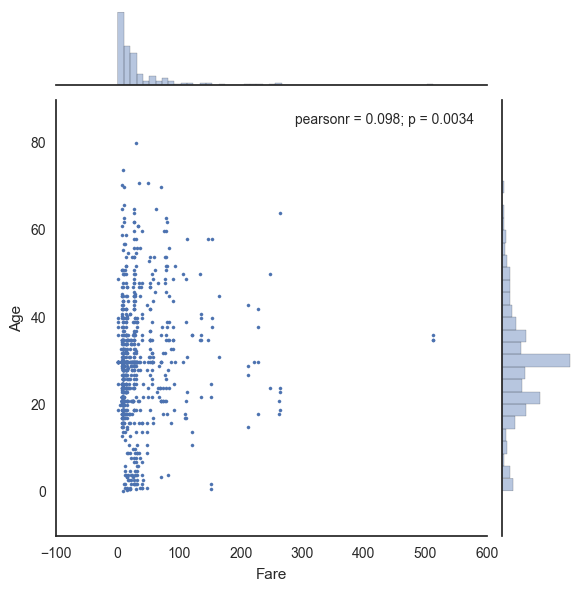

In [39]:
# looking for any relation between the two continous features, if any
sns.jointplot(x="Fare", y="Age", data=titanic,marker='.')
plt.savefig('RelationFarevsAge.png')

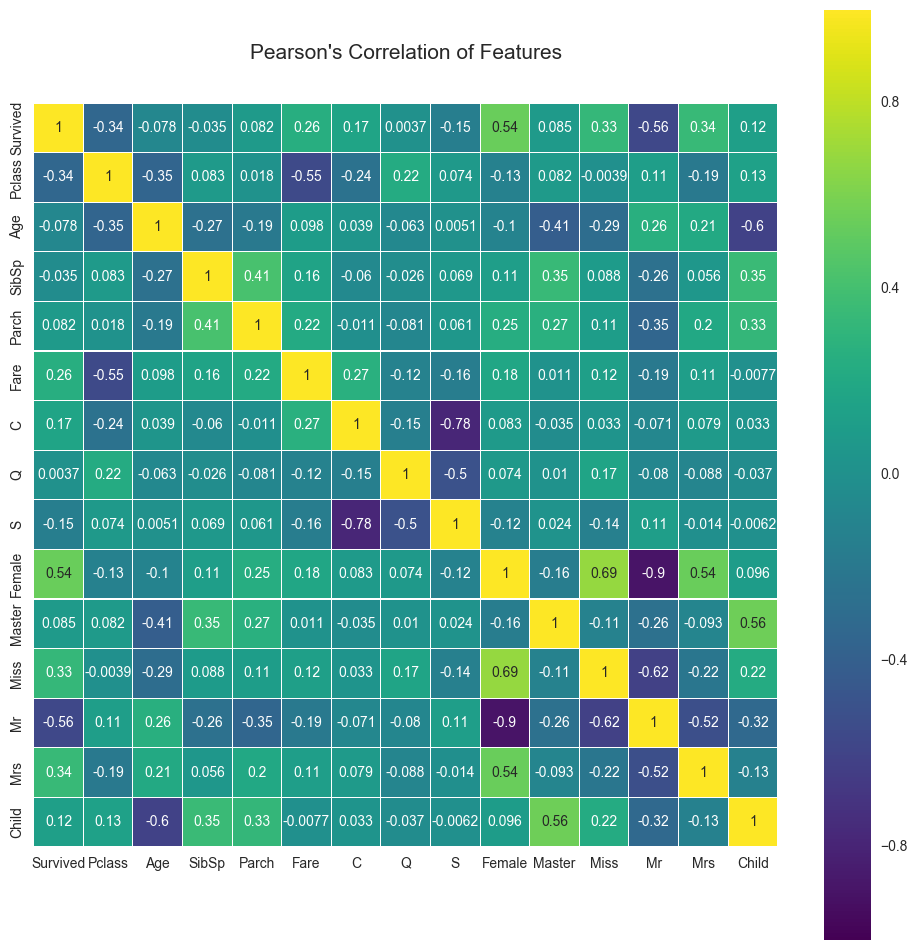

In [40]:
# Plot the Pearson's Correlation Diagram: 
# Child and Adult have a perfect decreasing linear correlation: we can skip Adult in the diagram
# Female and Male have a perfect decreasing linear correlation: we can skip Male in the diagram
df = titanic.drop(['Adult','Male'], axis=1,inplace=False)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Pearson's Correlation of Features", y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('PearsonCorrelationOfFeatures.png')
plt.show()

## Influence of factors on Survival

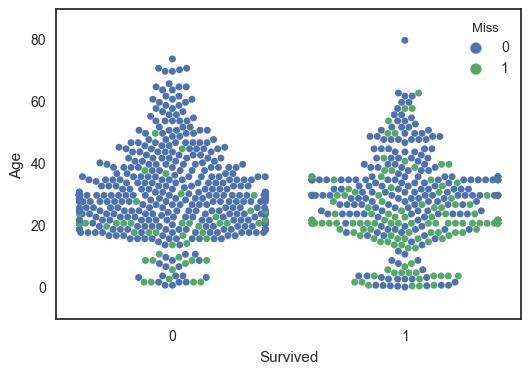

In [41]:
# THIS DIAGRAM TAKES TIME TO COMPUTE
# Analysis Survived, Age and Title Miss
sns.swarmplot(x="Survived", y="Age", data=titanic, hue="Miss")
plt.savefig('SexFactorv2.png')

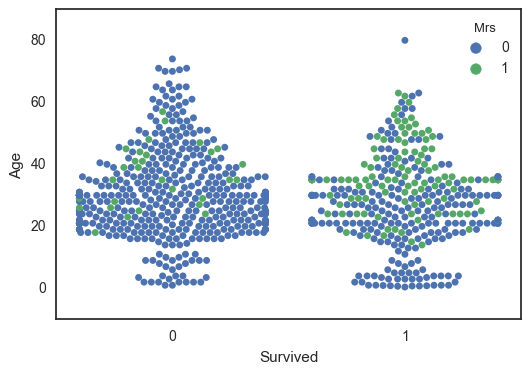

In [42]:
# THIS DIAGRAM TAKES TIME TO COMPUTE
# Analysis Survived, Age and Title Mrs
sns.swarmplot(x="Survived", y="Age", data=titanic, hue="Mrs")
plt.savefig('SexFactorv3.png')

## Change feature representation of Pclass

In [43]:
# Change feature representation of Pclass
titanic = pd.get_dummies(titanic,columns=['Pclass'])
# Change features names
titanic.rename(columns={'Pclass_1': '1stClass', 'Pclass_2': '2ndClass', 'Pclass_3': '3rdClass'}, inplace=True)
titanic.head()

Survived   Age  SibSp  Parch     Fare  C  Q  S  Female  Male  Master  Miss  \
0         0  22.0      1      0   7.2500  0  0  1       0     1       0     0   
1         1  38.0      1      0  71.2833  1  0  0       1     0       0     0   
2         1  26.0      0      0   7.9250  0  0  1       1     0       0     1   
3         1  35.0      1      0  53.1000  0  0  1       1     0       0     0   
4         0  35.0      0      0   8.0500  0  0  1       0     1       0     0   

   Mr  Mrs  Child  Adult  1stClass  2ndClass  3rdClass  
0   1    0    0.0    1.0         0         0         1  
1   0    1    0.0    1.0         1         0         0  
2   0    0    0.0    1.0         0         0         1  
3   0    1    0.0    1.0         1         0         0  
4   1    0    0.0    1.0         0         0         1

          1stClass  2ndClass  3rdClass
Survived                              
0             80.0      97.0     372.0
1            136.0      87.0     119.0


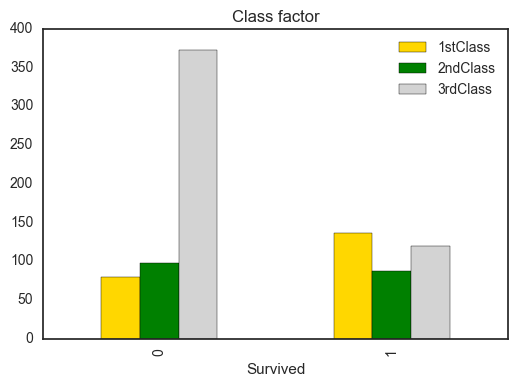

In [44]:
groupedby_survived = titanic.groupby('Survived')
df = groupedby_survived['1stClass','2ndClass','3rdClass'].sum()
print df
# Factor Class
df.plot(kind='bar',title='Class factor',color=['gold','green','lightgrey'])
plt.savefig('ClassFactorv2.png')
plt.show()

             C     Q      S
Survived                   
0         75.0  47.0  427.0
1         93.0  30.0  219.0


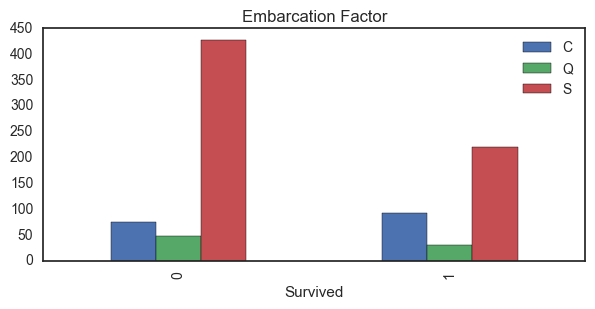

KEYS: C = Cherbourg, Q = Queenstown, S = Southampton


In [45]:
df = groupedby_survived['C','Q','S'].sum()
print df
# Factor Embarcation Point
plt.style.use('seaborn-white')
df.plot(kind='bar',figsize=(7,3),title='Embarcation Factor')
#fig = plt.figure()
#fig = plt.gcf()
plt.savefig('EmbarcationFactor.png')
plt.show()
print "KEYS: C = Cherbourg, Q = Queenstown, S = Southampton"

          Female   Male
Survived               
0           81.0  468.0
1          233.0  109.0


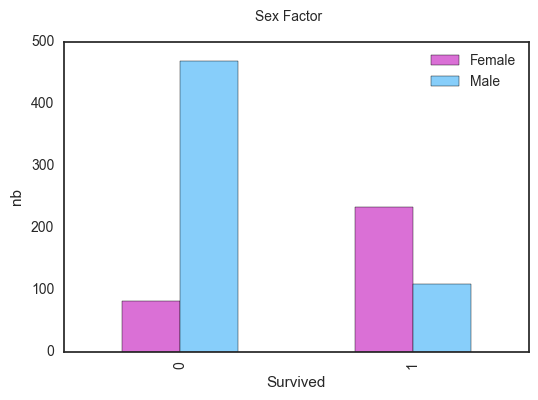

In [46]:
df = groupedby_survived['Female','Male'].sum()
print df
# Factor Sex
plt.style.use('seaborn-white')
df.plot(kind='bar',color=['orchid','lightskyblue'])
plt.suptitle('Sex Factor')
plt.xlabel('Survived')
plt.ylabel('nb')
plt.savefig('SexFactor.png')
plt.show()

          Master   Miss     Mr    Mrs
Survived                             
0           17.0   54.0  447.0   31.0
1           23.0  128.0   84.0  107.0


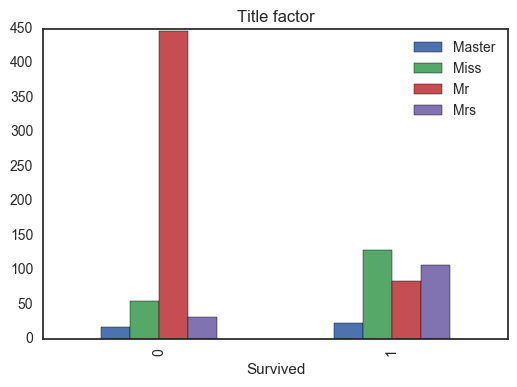

In [47]:
df = groupedby_survived['Master','Miss','Mr','Mrs'].sum()
print df
# Factor Title
df.plot(kind='bar',title='Title factor')
plt.savefig('TitleFactor.png')
plt.show()

          Adult  Child
Survived              
0         549.0   54.0
1         342.0   63.0


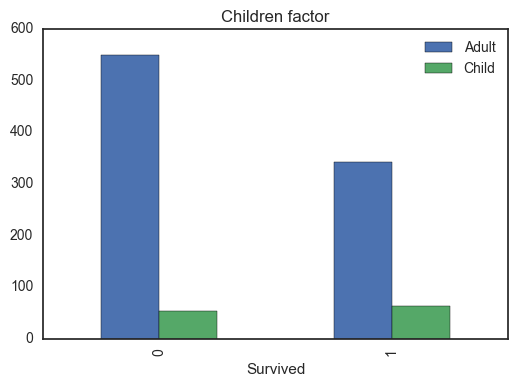

In [48]:
# Factor Child/Adult
df = groupedby_survived['Adult','Child'].sum()
print df
df.plot(kind='bar',title='Children factor')
plt.savefig('ChildFactorv2.png')
plt.show()